In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium


In [70]:
def load_data(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

In [71]:
def plt_avg_fire(df):
    plt.figure(figsize=(15, 6))
    yearly_avg = df.groupby('Year')['Estimated_fire_area'].mean()
    yearly_avg.plot(kind='line', marker='o')
    plt.title('Average Estimated Fire Area Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Fire Area (km²)')
    plt.grid(True)
    return plt

In [72]:
def plt_avg_fire_month(df):
    plt.figure(figsize=(12, 6))
    monthly_avg = df.groupby('Month')['Estimated_fire_area'].mean()
    monthly_avg.plot(kind='line', marker='o')
    plt.title('Average Estimated Fire Area by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Fire Area (km²)')
    plt.grid(True)
    return plt

In [73]:
def fire_brightness(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
    plt.title('Mean Estimated Fire Brightness by Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

In [74]:
def fire_count_pie(df):
    plt.figure(figsize=(10, 10))
    region_counts = df.groupby('Region')['Count'].sum()
    plt.pie(region_counts, labels=region_counts.index)
    plt.title('Distribution of Fire Pixel Counts by Region')
    return plt

In [75]:
def customize_fire_pie(df):
    plt.figure(figsize=(12, 8))
    region_counts = df.groupby('Region')['Count'].sum()
    colors = sns.color_palette('husl', n_colors=len(region_counts))
    plt.pie(region_counts, labels=region_counts.index, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Distribution of Fire Pixel Counts by Region (Enhanced)')
    return plt


In [76]:
def plt_fire_brightness_histogram(df):
    plt.figure(figsize=(12, 6))
    plt.hist(df['Mean_estimated_fire_brightness'], bins=50)
    plt.title('Distribution of Mean Estimated Fire Brightness')
    plt.xlabel('Fire Brightness (Kelvin)')
    plt.ylabel('Frequency')
    return plt


In [77]:
def plt_regional_brightness(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple="stack")
    plt.title('Distribution of Fire Brightness by Region')
    plt.xlabel('Fire Brightness (Kelvin)')
    return plt

In [78]:
def radiative_power_confidence(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Mean_estimated_fire_radiative_power', y='Mean_confidence', alpha=0.5)
    plt.title('Fire Radiative Power vs Confidence Level')
    plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
    plt.ylabel('Mean Confidence Level')
    return plt

In [79]:
def australia_wildfire_map():
    regions = {
        'Northern Territory': [-19.4914, 132.5510],
        'Western Australia': [-27.6728, 121.6283],
        'South Australia': [-30.0002, 136.2092],
        'Queensland': [-20.9176, 142.7028],
        'New South Wales': [-31.8759, 147.2869],
        'Victoria': [-37.0201, 144.9646],
        'Tasmania': [-41.4545, 145.9707]
    }
    
    # Create map centered on Australia
    m = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)
    
    # Add markers for each region
    for region, coords in regions.items():
        folium.Marker(
            coords,
            popup=region,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)
    
    return m

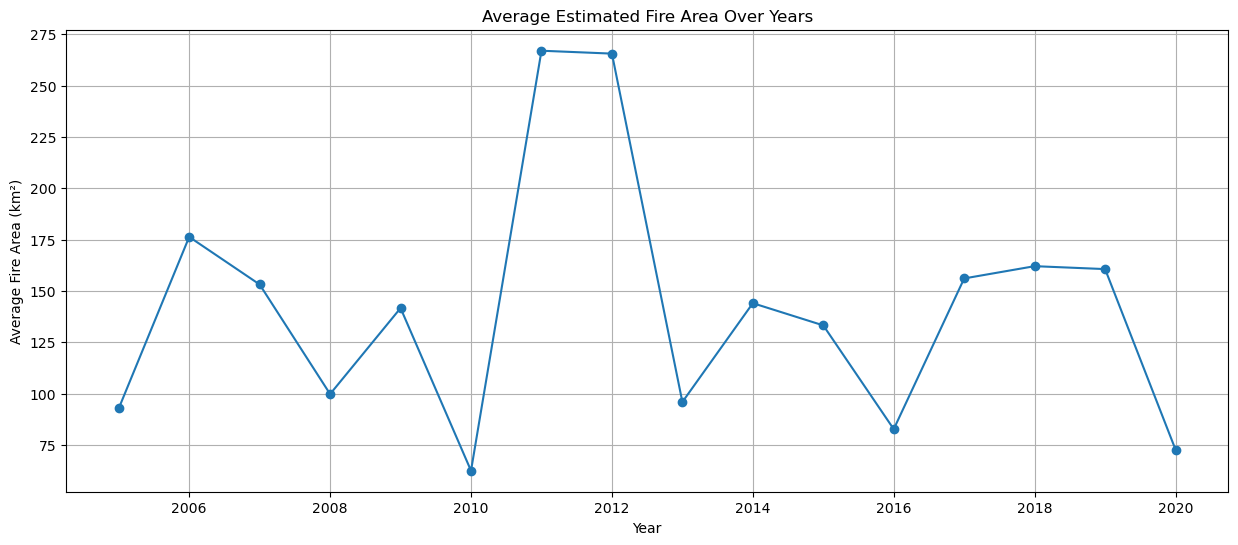

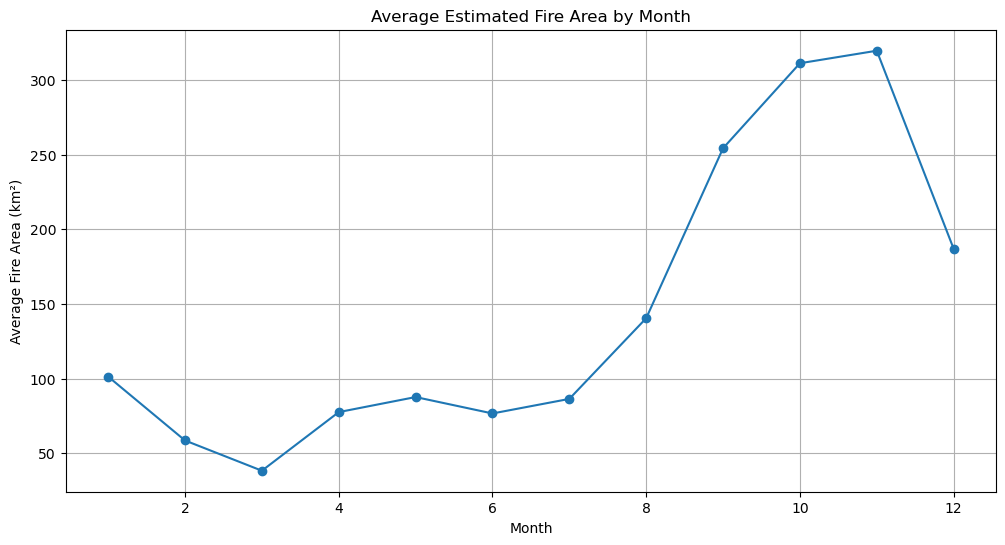

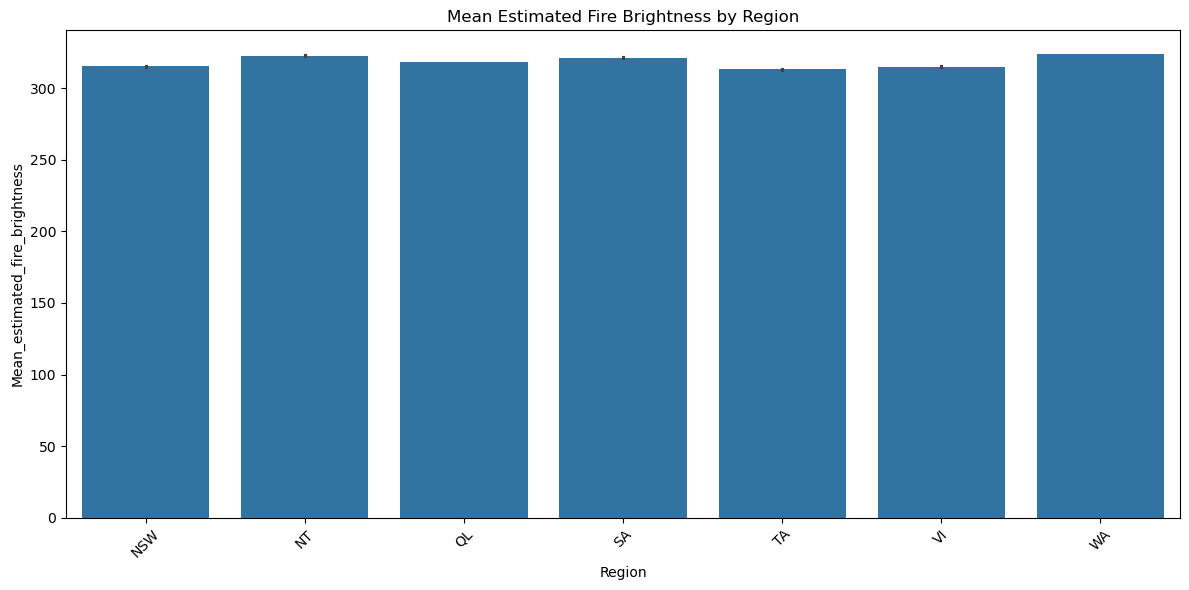

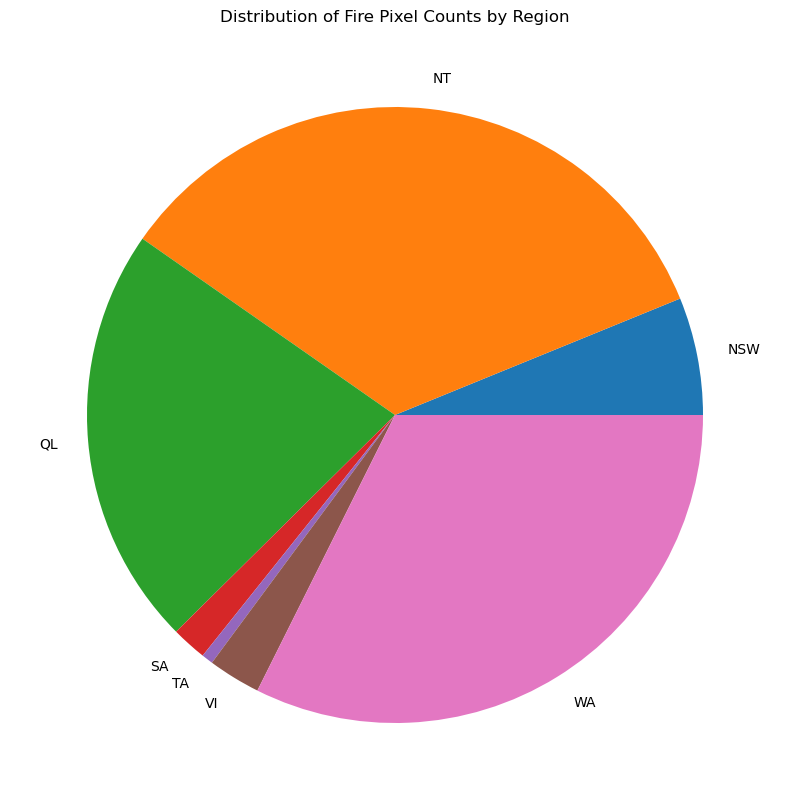

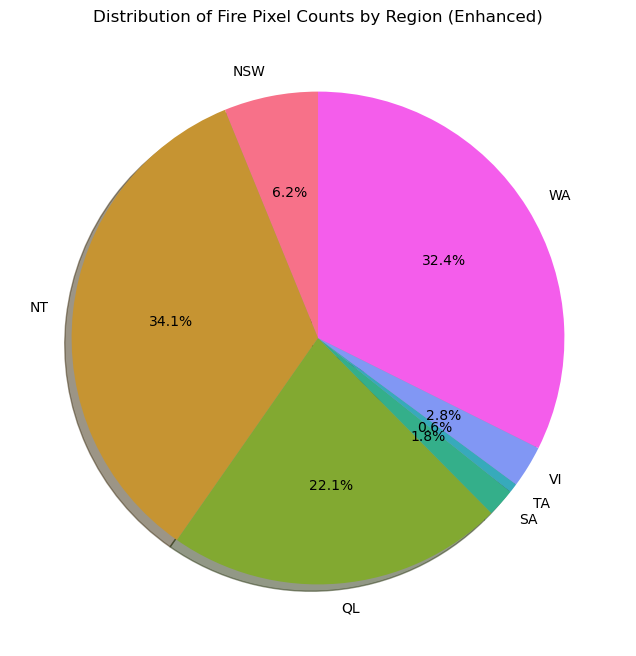

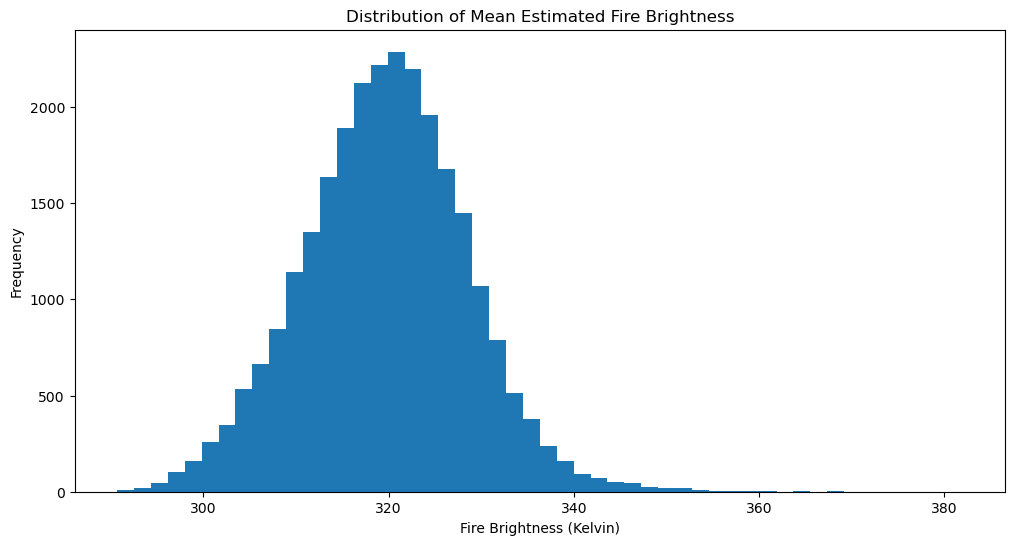

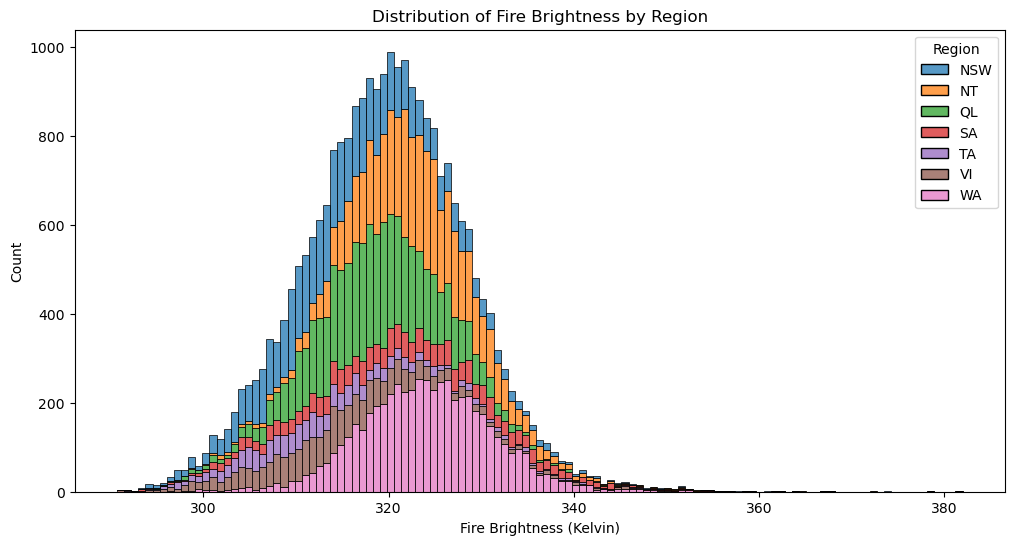

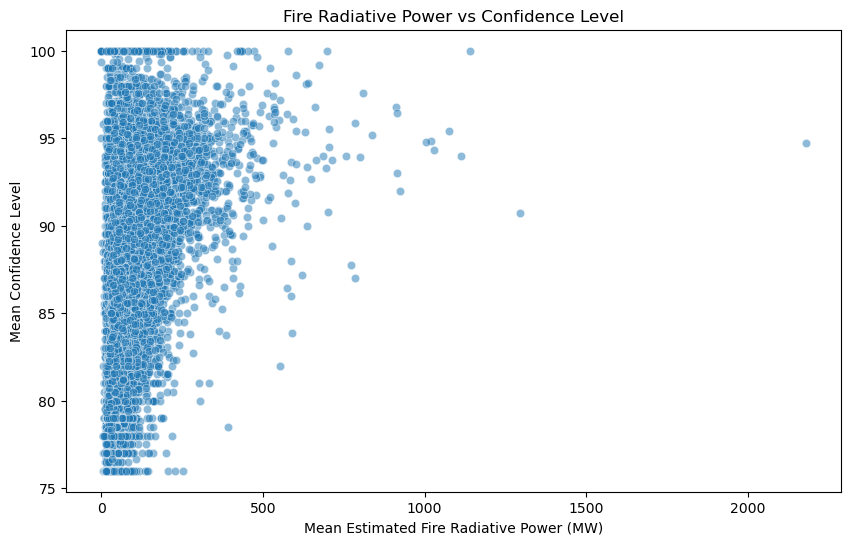

In [81]:
def main():
    
    df = load_data('Historical_Wildfires.csv')
    
    plt_avg_fire(df)
    plt_avg_fire_month(df)
    fire_brightness(df)
    fire_count_pie(df)
    customize_fire_pie(df)
    plt_fire_brightness_histogram(df)
    plt_regional_brightness(df)
    radiative_power_confidence(df)
    australia_wildfire_map().save('aus_fire_regions.html')
    
    
if __name__ == "__main__":
    main()